# K-Nearest Neighbors
### Modelo 06
- CountVectorizer
- Base B


#### Imports necessarios para funcionamento da aplicacao

In [1]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score
from nltk import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

#### Leitura do arquivo de dados

In [2]:
df = pd.read_csv('../../base_b.csv')

df.head()

,nome,categoria
0,BRAHMA,BRAHMA
1,BRAHMA 550ML,BRAHMA
2,BRAHMA CERV 350ML LT,BRAHMA
3,BRAHMA CERVEJA 350ML,BRAHMA
4,BRAHMA CERVEJA 350ML LT,BRAHMA


#### Efetua o tratamento dos dados

In [3]:
le = LabelEncoder()

df.categoria = le.fit_transform(df.categoria)

df.head()

,nome,categoria
0,BRAHMA,0
1,BRAHMA 550ML,0
2,BRAHMA CERV 350ML LT,0
3,BRAHMA CERVEJA 350ML,0
4,BRAHMA CERVEJA 350ML LT,0


#### Função de tokenização

In [4]:
stemmer = RSLPStemmer()

def token(text):
    text = re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', text)
    txt = word_tokenize(text.lower())
    return [stemmer.stem(word) for word in txt]

#### Lista de Stop Words

In [5]:
stopwords_arquivo = pd.read_csv('../../stopwords.csv')

lista_stop_words = [ token(word)[0] for word in stopwords_arquivo.stopwords.values ]

#### Separa base de treino e teste

In [6]:
X_train,X_test,y_train,y_test = train_test_split(
    df.nome, 
    df.categoria,
    test_size = 0.3, 
    random_state = 42
)

#### Define CountVectorizer

In [7]:
count_vectorizer = CountVectorizer(
    tokenizer=token,
    ngram_range=(1,3),
    stop_words=lista_stop_words
)

#### Cria vocabulário

In [8]:
X_train = count_vectorizer.fit_transform(X_train.values)

## Etapa de treinamento
#### Busca melhor valor para k

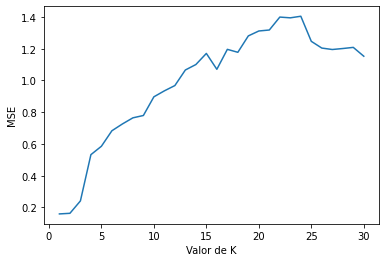

In [9]:
best_rmse = 1
k_neighbors = 0

k_range = range(1, 31)
k_scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
    if loss.mean() < best_rmse:
        best_rmse = loss.mean()
        k_neighbors = k
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K')
plt.ylabel('MSE')
plt.show()

#### Cria um classificador kNN

In [10]:
knn = KNeighborsClassifier(n_neighbors = k_neighbors)

#### Treina o classificador

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Etapa de Teste

#### Efetua a predição

In [12]:
Y_Pred = knn.predict(count_vectorizer.transform(X_test).toarray())

#### Calcula a acurácia do classificador

In [13]:
print('acuracia: {:.1f}'.format(accuracy_score(y_test, Y_Pred) * 100))
print('precisao: {:.1f}'.format(precision_score(y_test, Y_Pred, average="weighted") * 100))

acuracia: 96.6
precisao: 96.8


#### Tabela com os itens classificados errados na base de teste

In [14]:
d = []

for i in range(len(X_test)):
    au = count_vectorizer.transform([X_test.values[i]])
    pred = knn.predict(au.toarray())
    if (y_test.values[i] != pred[0]):
        d.append(
            [
                X_test.values[i],
                le.inverse_transform([y_test.values[i]])[0],
                le.inverse_transform(pred)[0]
            ]
        )

df_error = pd.DataFrame(data=d,columns=['Nome','Categoria Original','Pred'])
df_error

,Nome,Categoria Original,Pred
0,SUCO INT LARANJA 1LT,SUCO LARANJA INTEGRAL,SUCO UVA INTEGRAL
1,SUCO DAFRUTA LARANJA P,SUCO LARANJA,SUCO UVA
2,SUCO DEL VALLE FRESH LARANJA 400ML,SUCO LARANJA,SUCO LARANJA INTEGRAL
3,SUCO ALIANCA UVA BRANCO INTEG GFA 1.5,SUCO UVA INTEGRAL,SUCO UVA
4,SUCO ALIANCA UVA BCO INTEGRAL GFA 1L,SUCO UVA INTEGRAL,SUCO UVA
5,SUCO DE MAMAO COM LARANJA INTEGRAL,SUCO LARANJA INTEGRAL,SUCO LARANJA
6,SUCO DE UVA TINTO INT HUGO PIETRO 1500ML,SUCO UVA INTEGRAL,SUCO UVA
7,SUCO MAGUARY VITAKIDS DISNEY CARROS LARANJA CX...,SUCO LARANJA,SUCO UVA
8,SUCO DEL VALLE 100 UVA INTEGRAL 1L,SUCO UVA INTEGRAL,SUCO UVA
9,SUCO SOJA LARANJA 1L,SUCO LARANJA,SUCO LARANJA INTEGRAL


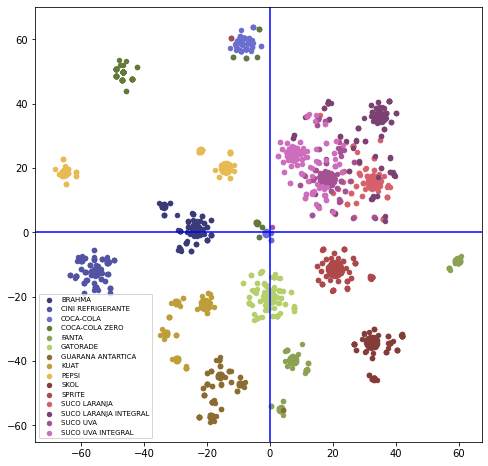

In [15]:
model = TSNE(n_components=2, init='pca', random_state=0)
transformed = model.fit_transform(X_train.todense())

fig, ax = plt.subplots(figsize=(8,8))

for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(transformed[:,0][ix], transformed[:,1][ix], c=[plt.cm.tab20b(float(g)/15)], s=20, label = le.inverse_transform([g])[0])

plt.legend(loc='lower left',fontsize=7)
plt.axhline(color='b')
plt.axvline(color='b')
plt.show()

#### Matriz de Confusão

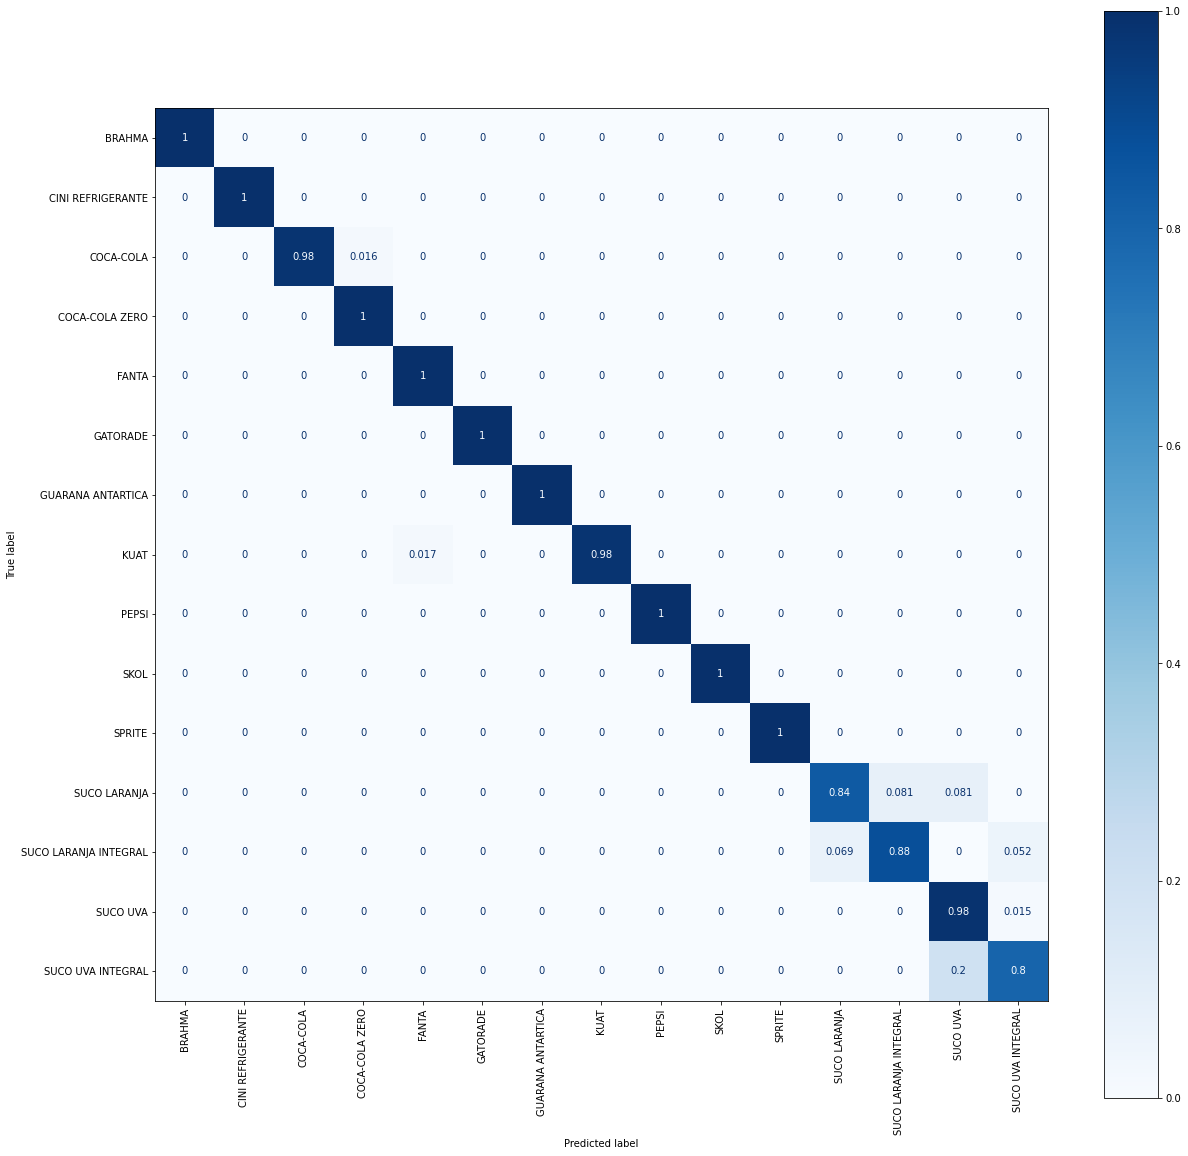

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(
    knn,
    count_vectorizer.transform(X_test).toarray(),
    y_test,
    display_labels=np.unique(le.inverse_transform(y_test)),
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax,
    xticks_rotation='vertical'
)